In [ ]:
import pandas as pd

In [ ]:
df = pd.read_csv('loan.csv')

In [ ]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [ ]:
del df['Loan_ID']

In [ ]:
df.head()

## Gender -> cat
## Married -> cat
## Dependents -> cat
## Education -> cat
## Self Employed -> cat
## ApplicatIncome -> cont
## CoapplicantIncome -> cont
## LoanAmount -> cont
## Loan_Amount_Term	-> numeric
## Credit History -> cat (numeric)
## Property_Area -> cat (multi)
## Loan Status -> target -> bin cat


,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# Cleaning


In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

## Gender


In [ ]:
df.Gender.value_counts() # binary categorical variable

Male      489
Female    112
Name: Gender, dtype: int64

In [ ]:
df.Gender.isna().sum()

13

In [ ]:
df.Gender = df.Gender.fillna('Male')

In [ ]:
df.Gender.isna().sum()

0

In [ ]:
df.Gender.dtypes

dtype('O')

## Married

In [ ]:
df.Married.value_counts() # binary categorical variable

Yes    398
No     213
Name: Married, dtype: int64

In [ ]:
df.Married.isna().sum()

3

In [ ]:
df.Married = df.Married.fillna('Yes')

In [ ]:
df.Married.isna().sum()

0

In [ ]:
df.Married.dtypes

dtype('O')

### Dependents


In [ ]:
df.Dependents.value_counts() # categorical data -> mode : 0

0     345
1     102
2     101
3+     51
Name: Dependents, dtype: int64

In [ ]:
df.Dependents.isna().sum()

15

In [ ]:
df.Dependents = df.Dependents.fillna('0')

In [ ]:
df.Dependents.isna().sum()

0

In [ ]:
df.Dependents.dtypes

dtype('O')

### Education

In [ ]:
df.Education.dtypes, df.Education.value_counts(), df.Education.isna().sum()

(dtype('O'),
 Graduate        480
 Not Graduate    134
 Name: Education, dtype: int64,
 0)

### Self Employed

In [ ]:
df.Self_Employed.dtypes, df.Self_Employed.value_counts(), df.Self_Employed.isna().sum()

(dtype('O'),
 No     500
 Yes     82
 Name: Self_Employed, dtype: int64,
 32)

In [ ]:
df.Self_Employed = df.Self_Employed.fillna('No')

In [ ]:
df.Self_Employed.isna().sum()

0

### ApplicantIncome

In [ ]:
df.ApplicantIncome.dtypes

dtype('int64')

In [ ]:
df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

In [ ]:
df.ApplicantIncome.isna().sum()

0

In [ ]:
## Outlier detection and correction
q3 = df.ApplicantIncome.quantile(0.75)
q1 = df.ApplicantIncome.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold

df.ApplicantIncome = df.ApplicantIncome.clip(lower_threshold, upper_threshold)

In [ ]:
df.ApplicantIncome.describe()

count      614.000000
mean      4617.111564
std       2479.851729
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      10171.250000
Name: ApplicantIncome, dtype: float64

### CoapplicantIncome

In [ ]:
df.CoapplicantIncome.dtypes, df.CoapplicantIncome.describe(), df.CoapplicantIncome.isna().sum()

(dtype('float64'),
 count      614.000000
 mean      1621.245798
 std       2926.248369
 min          0.000000
 25%          0.000000
 50%       1188.500000
 75%       2297.250000
 max      41667.000000
 Name: CoapplicantIncome, dtype: float64,
 0)

In [ ]:
## Outlier detection and correction
q3 = df.CoapplicantIncome.quantile(0.75)
q1 = df.CoapplicantIncome.quantile(0.25)
iqr = q3 - q1

upper_threshold = q3 + (1.5 * iqr)
lower_threshold = q1 - (1.5 * iqr)

q1, q3, iqr, upper_threshold, lower_threshold

df.CoapplicantIncome = df.CoapplicantIncome.clip(lower_threshold, upper_threshold)

### LoanAmount

In [ ]:
df.LoanAmount.dtypes

dtype('float64')

In [ ]:
df.LoanAmount.describe()

count    592.000000
mean     146.412162
std       85.587325
min        9.000000
25%      100.000000
50%      128.000000
75%      168.000000
max      700.000000
Name: LoanAmount, dtype: float64

In [ ]:
df.dropna(subset = ['LoanAmount'], inplace=True)

In [ ]:
df.LoanAmount.isna().sum()

0

### Loan_Amount_Term

In [ ]:
df.Loan_Amount_Term.dtypes

dtype('float64')

In [ ]:
df.Loan_Amount_Term.isna().sum()

14

In [ ]:
df.Loan_Amount_Term.value_counts()

360.0    493
180.0     42
480.0     15
300.0     13
84.0       4
120.0      3
240.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [ ]:
# df.Loan_Amount_Term.fillna(360) -> code to fill the missing values with mode

In [ ]:
df.dtypes

Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome      float64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [ ]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer #MICE Imputer


imp_mean = IterativeImputer(random_state=0)

imp_mean.fit(df[['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']])

df[['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']] = imp_mean.transform(df[['Loan_Amount_Term', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Credit_History']])

In [ ]:
df.Loan_Amount_Term.isna().sum()

0

### Credit_History

In [ ]:
df.Credit_History.dtypes

dtype('float64')

In [ ]:
df.Credit_History.describe()

count    592.000000
mean       0.842885
std        0.348340
min        0.000000
25%        1.000000
50%        1.000000
75%        1.000000
max        1.000000
Name: Credit_History, dtype: float64

In [ ]:
df.Credit_History.isna().sum()

0

### Property_Area

In [ ]:
df.Property_Area.dtypes, df.Property_Area.isna().sum()

(dtype('O'), 0)

### Loan_Status

In [ ]:
df.Loan_Status.dtypes, df.Loan_Status.isna().sum()

(dtype('O'), 0)

## Duplicates

In [ ]:
df = df.drop_duplicates()

In [ ]:
df.shape

(592, 12)

# EDA

In [ ]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

<Axes: xlabel='Gender'>

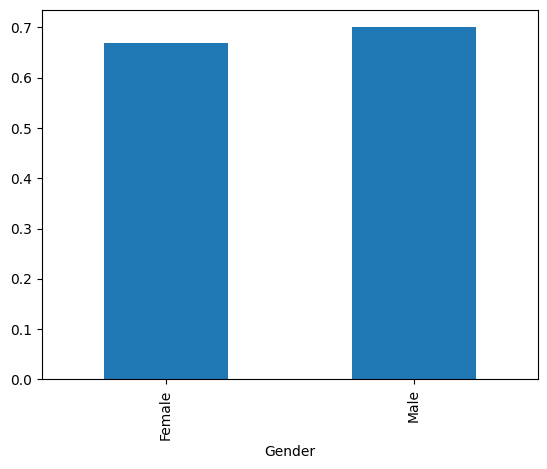

In [ ]:
import seaborn as sns

df['target'] = df.Loan_Status.copy()
df.target = df.target.map({'Y':1, 'N':0})


df.groupby('Gender')['target'].mean().plot(kind = 'bar')

Chances of getting the loan is not changing much with the gender => Gender is not an important feature => Drop the feature

In [ ]:
del df['Gender']

### Married

<Axes: xlabel='Married'>

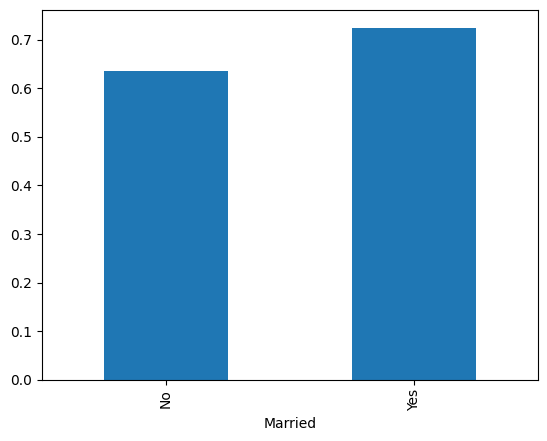

In [ ]:
df.groupby('Married')['target'].mean().plot(kind = 'bar')

### Dependents

<Axes: xlabel='Dependents'>

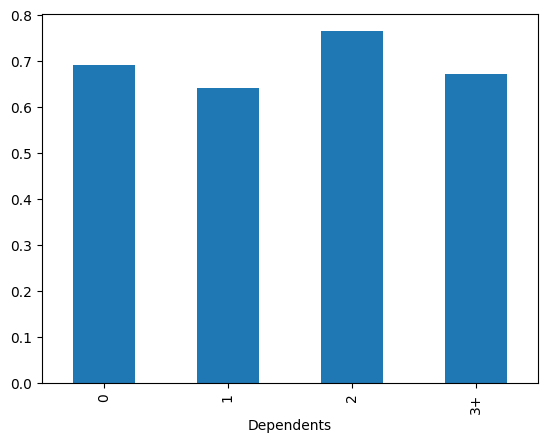

In [ ]:
df.groupby('Dependents')['target'].mean().plot(kind = 'bar')

### Education

<Axes: xlabel='Education'>

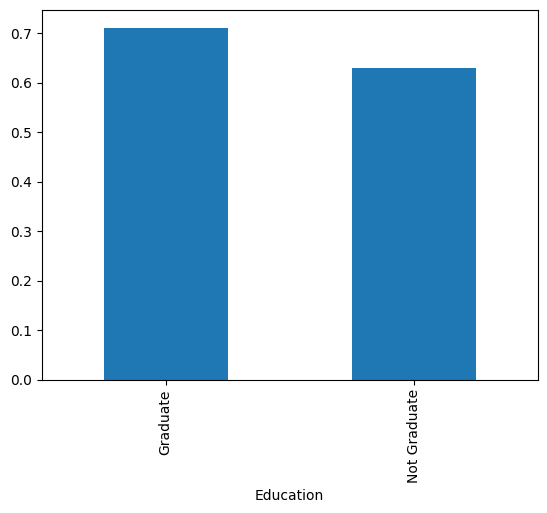

In [ ]:
df.groupby('Education')['target'].mean().plot(kind = 'bar')

### Self_Employed

<Axes: xlabel='Self_Employed'>

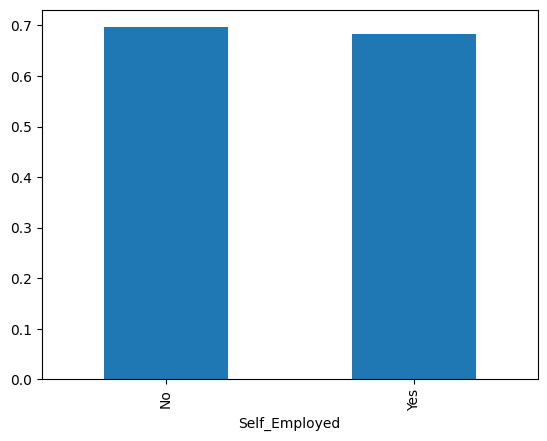

In [ ]:
df.groupby('Self_Employed')['target'].mean().plot(kind = 'bar')

In [ ]:
del df['Self_Employed']

### ApplicantIncome

<Axes: xlabel='Loan_Status', ylabel='ApplicantIncome'>

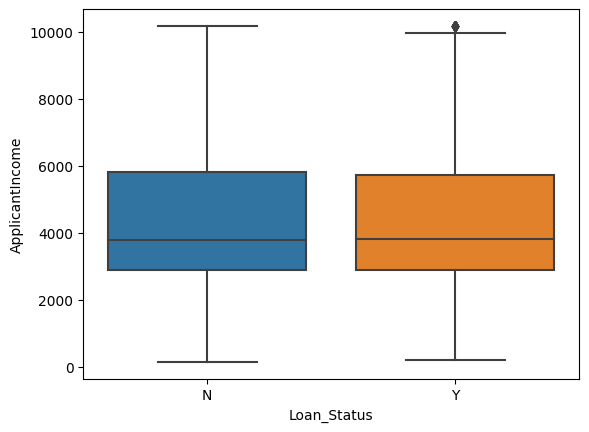

In [ ]:
sns.boxplot(x = "Loan_Status", y = 'ApplicantIncome', data = df)

<Axes: xlabel='Loan_Status', ylabel='CoapplicantIncome'>

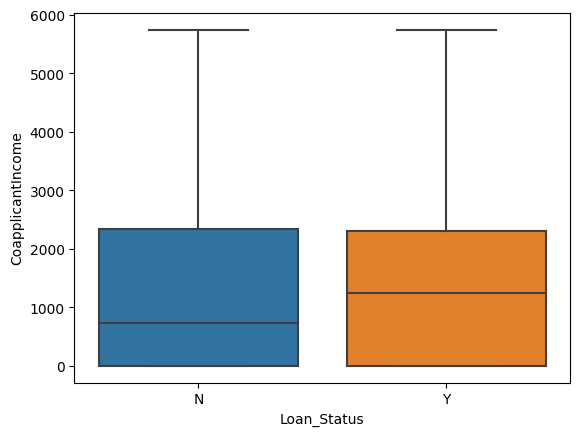

In [ ]:
sns.boxplot(x = "Loan_Status", y = 'CoapplicantIncome', data = df)

<Axes: xlabel='Loan_Status', ylabel='LoanAmount'>

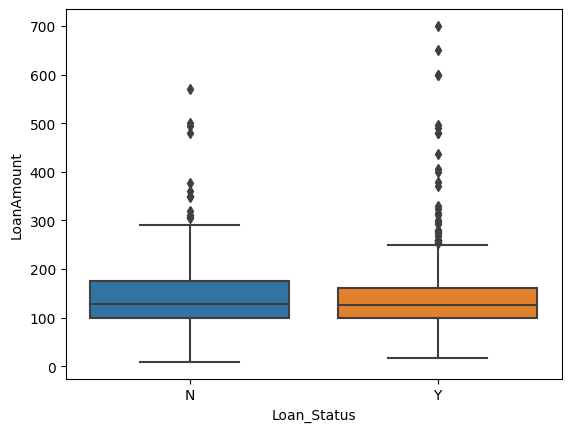

In [ ]:

sns.boxplot(x = "Loan_Status", y = 'LoanAmount', data = df)

In [ ]:
df['ratio'] = df['LoanAmount'] * 1000/ (df['ApplicantIncome'] + df['CoapplicantIncome'])  ##derived feature
df.ratio.describe()

count    592.000000
mean      24.867969
std        8.882779
min        3.784693
25%       19.963315
50%       24.660669
75%       28.861775
max       82.711645
Name: ratio, dtype: float64

<Axes: xlabel='target'>

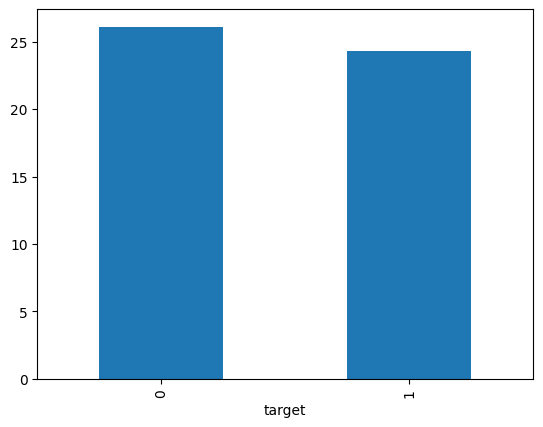

In [ ]:
df.groupby('target')['ratio'].mean().plot(kind = 'bar')

In [ ]:
del df['ApplicantIncome']
del df['LoanAmount']

### Credit_History

<Axes: xlabel='target'>

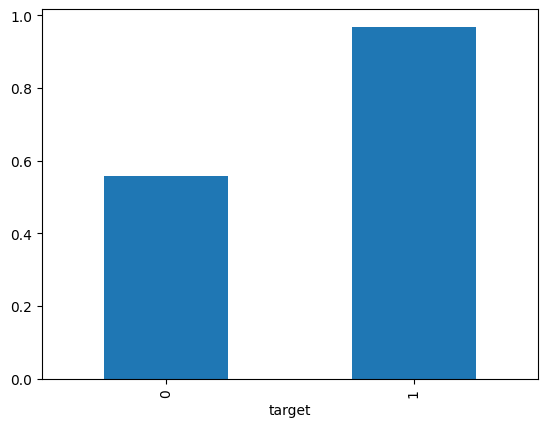

In [ ]:
df.groupby('target')['Credit_History'].mean().plot(kind = 'bar')

In [ ]:
df.columns

Index(['Married', 'Dependents', 'Education', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'target', 'ratio'],
      dtype='object')

In [ ]:
del df['Loan_Status']

### Property_Area

<Axes: xlabel='Property_Area'>

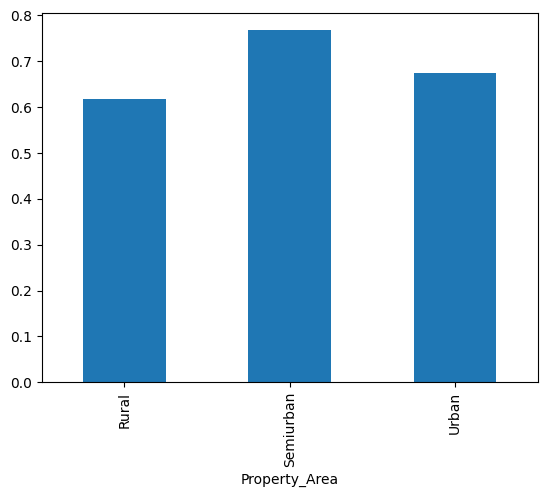

In [ ]:

df.groupby('Property_Area')['target'].mean().plot(kind = 'bar')

In [ ]:
df.columns

Index(['Married', 'Dependents', 'Education', 'CoapplicantIncome',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'target',
       'ratio'],
      dtype='object')

In [ ]:
df.groupby('Property_Area')['target'].mean()

Property_Area
Rural        0.618497
Semiurban    0.767544
Urban        0.675393
Name: target, dtype: float64

### Encode

In [ ]:
df.dtypes

Married               object
Dependents            object
Education             object
CoapplicantIncome    float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
target                 int64
ratio                float64
dtype: object

In [ ]:
df.Married

1      Yes
2      Yes
3      Yes
4       No
5      Yes
      ... 
609     No
610    Yes
611    Yes
612    Yes
613     No
Name: Married, Length: 592, dtype: object

In [ ]:
df.Married = df.Married.map({'No':0, 'Yes':1})
df.Dependents = df.Dependents.map({'1':0, '3+':1, '0' : 2, '2' : 3})
df.Education = df.Education.map({'Graduate' : 1, 'Not Graduate' : 0})
df.Property_Area = df.Property_Area.map({'Rural' : 0, 'Urban' : 1, 'Semiurban' : 2})

In [ ]:
df

,Married,Dependents,Education,CoapplicantIncome,Loan_Amount_Term,Credit_History,Property_Area,target,ratio
1,1,0,1,1508.0,360.0,1.0,0,0,21.014612
2,1,2,1,0.0,360.0,1.0,1,1,22.000000
3,1,2,0,2358.0,360.0,1.0,1,1,24.286582
4,0,2,1,0.0,360.0,1.0,1,1,23.500000
5,1,3,1,4196.0,360.0,1.0,1,1,27.774888
...,...,...,...,...,...,...,...,...,...
609,0,2,1,0.0,360.0,1.0,0,1,24.482759
610,1,1,1,0.0,180.0,1.0,0,1,9.741841
611,1,0,1,240.0,360.0,1.0,1,1,30.437921
612,1,3,1,0.0,360.0,1.0,1,1,24.660425


### Split


In [ ]:
y = df.target
X = df.drop(columns = ['target'])

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

## Balnced data ?


In [ ]:
y_train.value_counts()/y_train.shape[0]

1    0.701903
0    0.298097
Name: target, dtype: float64

## Scale


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)

X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
pd.DataFrame(X_train_scaled).describe()

,0,1,2,3,4,5,6,7
count,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02,4.730000e+02
mean,-8.449900e-17,-2.253307e-17,-7.323247e-17,4.506614e-17,-6.684810e-16,-1.877756e-17,9.013227e-17,-1.445872e-16
std,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00,1.001059e+00
min,-1.359926e+00,-1.856887e+00,-1.968829e+00,-8.721455e-01,-4.869531e+00,-2.463337e+00,-1.319948e+00,-2.289376e+00
25%,-1.359926e+00,-7.805298e-01,5.079161e-01,-8.721455e-01,2.899464e-01,4.415635e-01,-1.319948e+00,-5.653931e-01
50%,7.353344e-01,2.958276e-01,5.079161e-01,-1.193277e-01,2.899464e-01,4.415635e-01,-1.099957e-01,-3.048088e-02
75%,7.353344e-01,2.958276e-01,5.079161e-01,5.311068e-01,2.899464e-01,4.415635e-01,1.099957e+00,4.381336e-01
max,7.353344e-01,1.372185e+00,5.079161e-01,2.586676e+00,2.200864e+00,4.415635e-01,1.099957e+00,6.219428e+00


## ML Modelling


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score

lr = LogisticRegression()
lr.fit(X_train_scaled, y_train)
f'Test data accuracy is : {lr.score(X_test_scaled, y_test)}, {f1_score(y_test, lr.predict(X_test_scaled))} '

'Test data accuracy is : 0.7899159663865546, 0.8603351955307262 '

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
import numpy as np

for k in [1,2,3,4,5,6,7,8,9,10,12,13, 14, 15,16,17, 18, 19, 20,25,30,50]:
  knn = KNeighborsClassifier(k)
  knn.fit(X_train_scaled, y_train)
  train_score = knn.score(X_train_scaled, y_train)
  knn = KNeighborsClassifier(k)
  cross_val_result = np.mean(cross_val_score(knn, X_train_scaled, y_train, cv = 10))
  print(f'K : {k}, training score : {train_score} and cross-val score : {cross_val_result}')


KNeighborsClassifier()


K : 1, training score : 1.0 and cross-val score : 0.748404255319149
K : 2, training score : 0.879492600422833 and cross-val score : 0.6744237588652482
K : 3, training score : 0.8520084566596194 and cross-val score : 0.7632092198581562
K : 4, training score : 0.8393234672304439 and cross-val score : 0.7504875886524823
K : 5, training score : 0.828752642706131 and cross-val score : 0.8011968085106382
K : 6, training score : 0.8308668076109936 and cross-val score : 0.7823138297872341
K : 7, training score : 0.8245243128964059 and cross-val score : 0.8054078014184396
K : 8, training score : 0.8054968287526427 and cross-val score : 0.7990691489361702
K : 9, training score : 0.8160676532769556 and cross-val score : 0.8138741134751772
K : 10, training score : 0.813953488372093 and cross-val score : 0.8033687943262411
K : 12, training score : 0.8224101479915433 and cross-val score : 0.8117464539007091
K : 13, training score : 0.8202959830866807 and cross-val score : 0.818040780141844
K : 14, t

KNeighborsClassifier()

In [ ]:
knn = KNeighborsClassifier(16)
knn.fit(X_train_scaled, y_train)
f'Test data accuracy is : {knn.score(X_test_scaled, y_test)}, {f1_score(y_test, knn.predict(X_test_scaled))} '

'Test data accuracy is : 0.7899159663865546, 0.8603351955307262 '

### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

for depth in [1,2,3,4,5,6,7,8,9,10,15,20,30]:
  dt = DecisionTreeClassifier(max_depth = depth)
  dt.fit(X_train_scaled, y_train)
  train_score = dt.score(X_train_scaled, y_train)
  dt = DecisionTreeClassifier(max_depth = depth)
  cross_val_result = np.mean(cross_val_score(dt, X_train_scaled, y_train, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.8224101479915433 and cross-val score : 0.820168439716312
Depth : 2, training score : 0.8329809725158562 and cross-val score : 0.8244237588652481
Depth : 3, training score : 0.8350951374207188 and cross-val score : 0.820168439716312
Depth : 4, training score : 0.8520084566596194 and cross-val score : 0.807491134751773
Depth : 5, training score : 0.864693446088795 and cross-val score : 0.8052304964539008
Depth : 6, training score : 0.879492600422833 and cross-val score : 0.8009751773049647
Depth : 7, training score : 0.8942917547568711 and cross-val score : 0.7924645390070921
Depth : 8, training score : 0.9112050739957717 and cross-val score : 0.7734042553191489
Depth : 9, training score : 0.9365750528541226 and cross-val score : 0.7755319148936171
Depth : 10, training score : 0.9556025369978859 and cross-val score : 0.7818705673758866
Depth : 15, training score : 0.9915433403805497 and cross-val score : 0.7818705673758866
Depth : 20, training score : 1.0 an

In [ ]:
dt = DecisionTreeClassifier(max_depth = 2)
dt.fit(X_train_scaled, y_train)
f'Test data accuracy is : {dt.score(X_test_scaled, y_test)}, {f1_score(y_test, dt.predict(X_test_scaled))} '

'Test data accuracy is : 0.7983193277310925, 0.8636363636363636 '

### Voting Classifier

In [ ]:
from sklearn.ensemble import VotingClassifier

model = VotingClassifier(estimators = [('logistic_regression', lr),('k-nn', knn),('decision-tree', dt)])
model.fit(X_train_scaled, y_train)
f'Test data accuracy is : {model.score(X_test_scaled, y_test)}, {f1_score(y_test, model.predict(X_test_scaled))} '

'Test data accuracy is : 0.7899159663865546, 0.8603351955307262 '

### RandomForest Classifier

In [ ]:
from sklearn.ensemble import RandomForestClassifier

for depth in [1,2,3,4,5,6,7,8,9,10,12,15,20]:
  rf = RandomForestClassifier(max_depth = depth)
  rf.fit(X_train_scaled, y_train)
  train_score = rf.score(X_train_scaled, y_train)
  cross_val_result = np.mean(cross_val_score(rf, X_train_scaled, y_train, cv = 10))
  print(f'Depth : {depth}, training score : {train_score} and cross-val score : {cross_val_result}')

Depth : 1, training score : 0.7019027484143763 and cross-val score : 0.7019060283687943
Depth : 2, training score : 0.8245243128964059 and cross-val score : 0.811790780141844
Depth : 3, training score : 0.8266384778012685 and cross-val score : 0.818040780141844
Depth : 4, training score : 0.8498942917547568 and cross-val score : 0.815913120567376
Depth : 5, training score : 0.8562367864693446 and cross-val score : 0.815868794326241
Depth : 6, training score : 0.8583509513742071 and cross-val score : 0.818040780141844
Depth : 7, training score : 0.8731501057082452 and cross-val score : 0.818040780141844
Depth : 8, training score : 0.8879492600422833 and cross-val score : 0.818040780141844
Depth : 9, training score : 0.9175475687103594 and cross-val score : 0.8200797872340425
Depth : 10, training score : 0.9386892177589852 and cross-val score : 0.8116578014184397
Depth : 12, training score : 0.9619450317124736 and cross-val score : 0.803191489361702
Depth : 15, training score : 1.0 and c

In [ ]:
rf = RandomForestClassifier(max_depth = 6)
rf.fit(X_train_scaled, y_train)
f'Test data accuracy is : {rf.score(X_test_scaled, y_test)}, {f1_score(y_test, rf.predict(X_test_scaled))} '

'Test data accuracy is : 0.7983193277310925, 0.8651685393258427 '

In [ ]:
list(zip(X.columns, rf.feature_importances_))

[('Married', 0.02509733335198556),
 ('Dependents', 0.04660910669732334),
 ('Education', 0.019610922715519147),
 ('CoapplicantIncome', 0.10194774868455447),
 ('Loan_Amount_Term', 0.05258470774575705),
 ('Credit_History', 0.5004380114233891),
 ('Property_Area', 0.06105809471055749),
 ('ratio', 0.19265407467091392)]

## XG Boost

In [ ]:
import xgboost as xgb

for lr in [0.001, 0.002, 0.005, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.2, 0.5, 1]:
  xg = xgb.XGBClassifier(learning_rate=lr)
  xg.fit(X_train_scaled, y_train)
  train_score = xg.score(X_train_scaled, y_train)
  cross_val_result = np.mean(cross_val_score(xg, X_train_scaled, y_train, cv = 10))
  print(f'Learning Rate : {lr}, training score : {train_score} and cross-val score : {cross_val_result}')

Learning Rate : 0.001, training score : 0.8498942917547568 and cross-val score : 0.8011524822695035
Learning Rate : 0.002, training score : 0.8520084566596194 and cross-val score : 0.803235815602837
Learning Rate : 0.005, training score : 0.854122621564482 and cross-val score : 0.807491134751773
Learning Rate : 0.01, training score : 0.8562367864693446 and cross-val score : 0.805363475177305
Learning Rate : 0.02, training score : 0.8604651162790697 and cross-val score : 0.8096187943262413
Learning Rate : 0.03, training score : 0.8858350951374208 and cross-val score : 0.8116578014184397
Learning Rate : 0.04, training score : 0.8921775898520085 and cross-val score : 0.811613475177305
Learning Rate : 0.05, training score : 0.9006342494714588 and cross-val score : 0.8117021276595745
Learning Rate : 0.06, training score : 0.9217758985200846 and cross-val score : 0.8095301418439718
Learning Rate : 0.07, training score : 0.9344608879492601 and cross-val score : 0.8095301418439715
Learning Rat

In [ ]:
xg = xgb.XGBClassifier(learning_rate=0.05)
xg.fit(X_train_scaled, y_train)
f'Test data accuracy is : {xg.score(X_test_scaled, y_test)}, {f1_score(y_test, xg.predict(X_test_scaled))} '

'Test data accuracy is : 0.773109243697479, 0.8439306358381502 '

In [ ]:
list(zip(X.columns, xg.feature_importances_))

[('Married', 0.041713253),
 ('Dependents', 0.04988714),
 ('Education', 0.10344654),
 ('CoapplicantIncome', 0.060658287),
 ('Loan_Amount_Term', 0.036324933),
 ('Credit_History', 0.60539657),
 ('Property_Area', 0.043768145),
 ('ratio', 0.058805034)]